In [1]:
import pandas as pd

# Load the provided data files
train_data_path = 'train.csv'
test_data_path = 'test.csv'

# Reading the data into pandas dataframes
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Displaying the first few rows of each dataframe to understand the structure of the data
train_head = train_df.head()
test_head = test_df.head()

train_head, test_head


(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

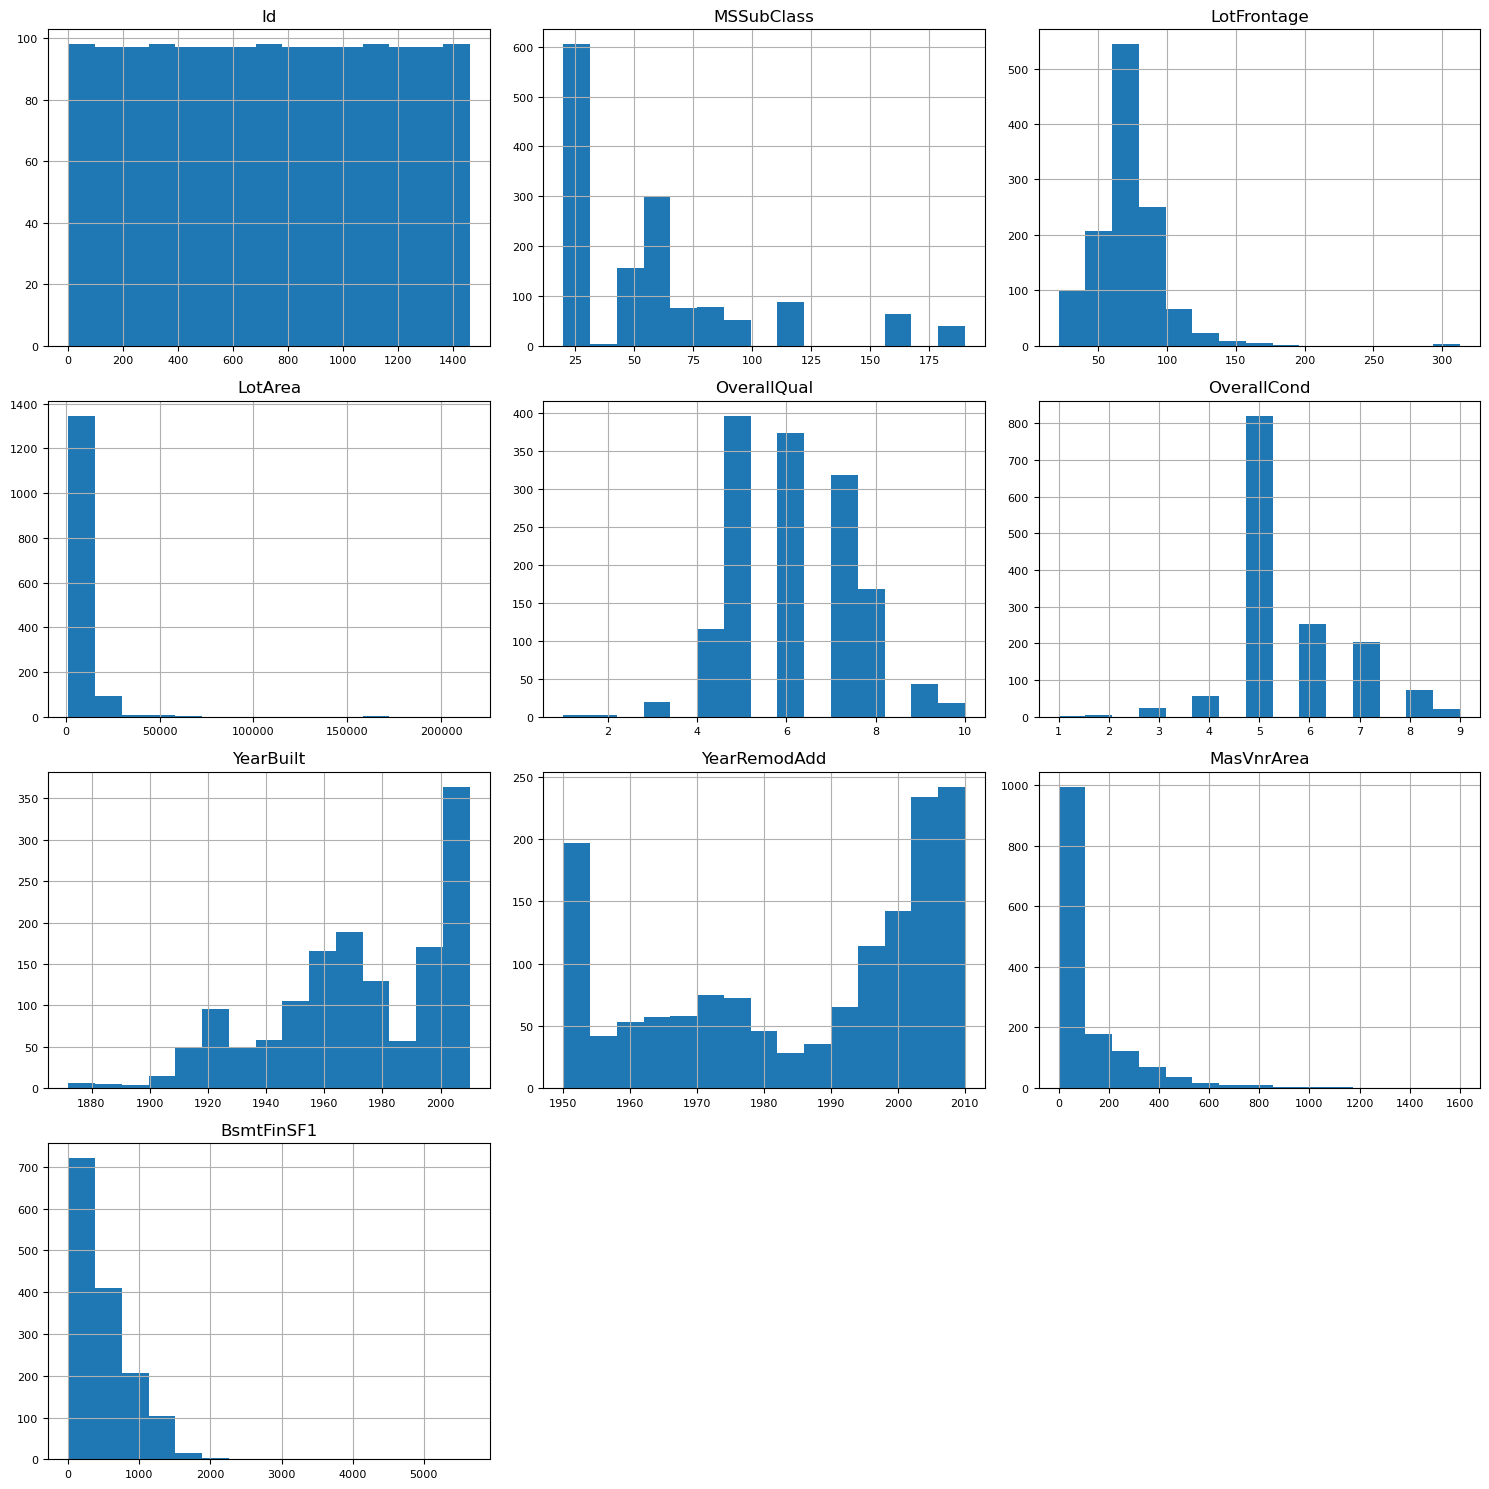

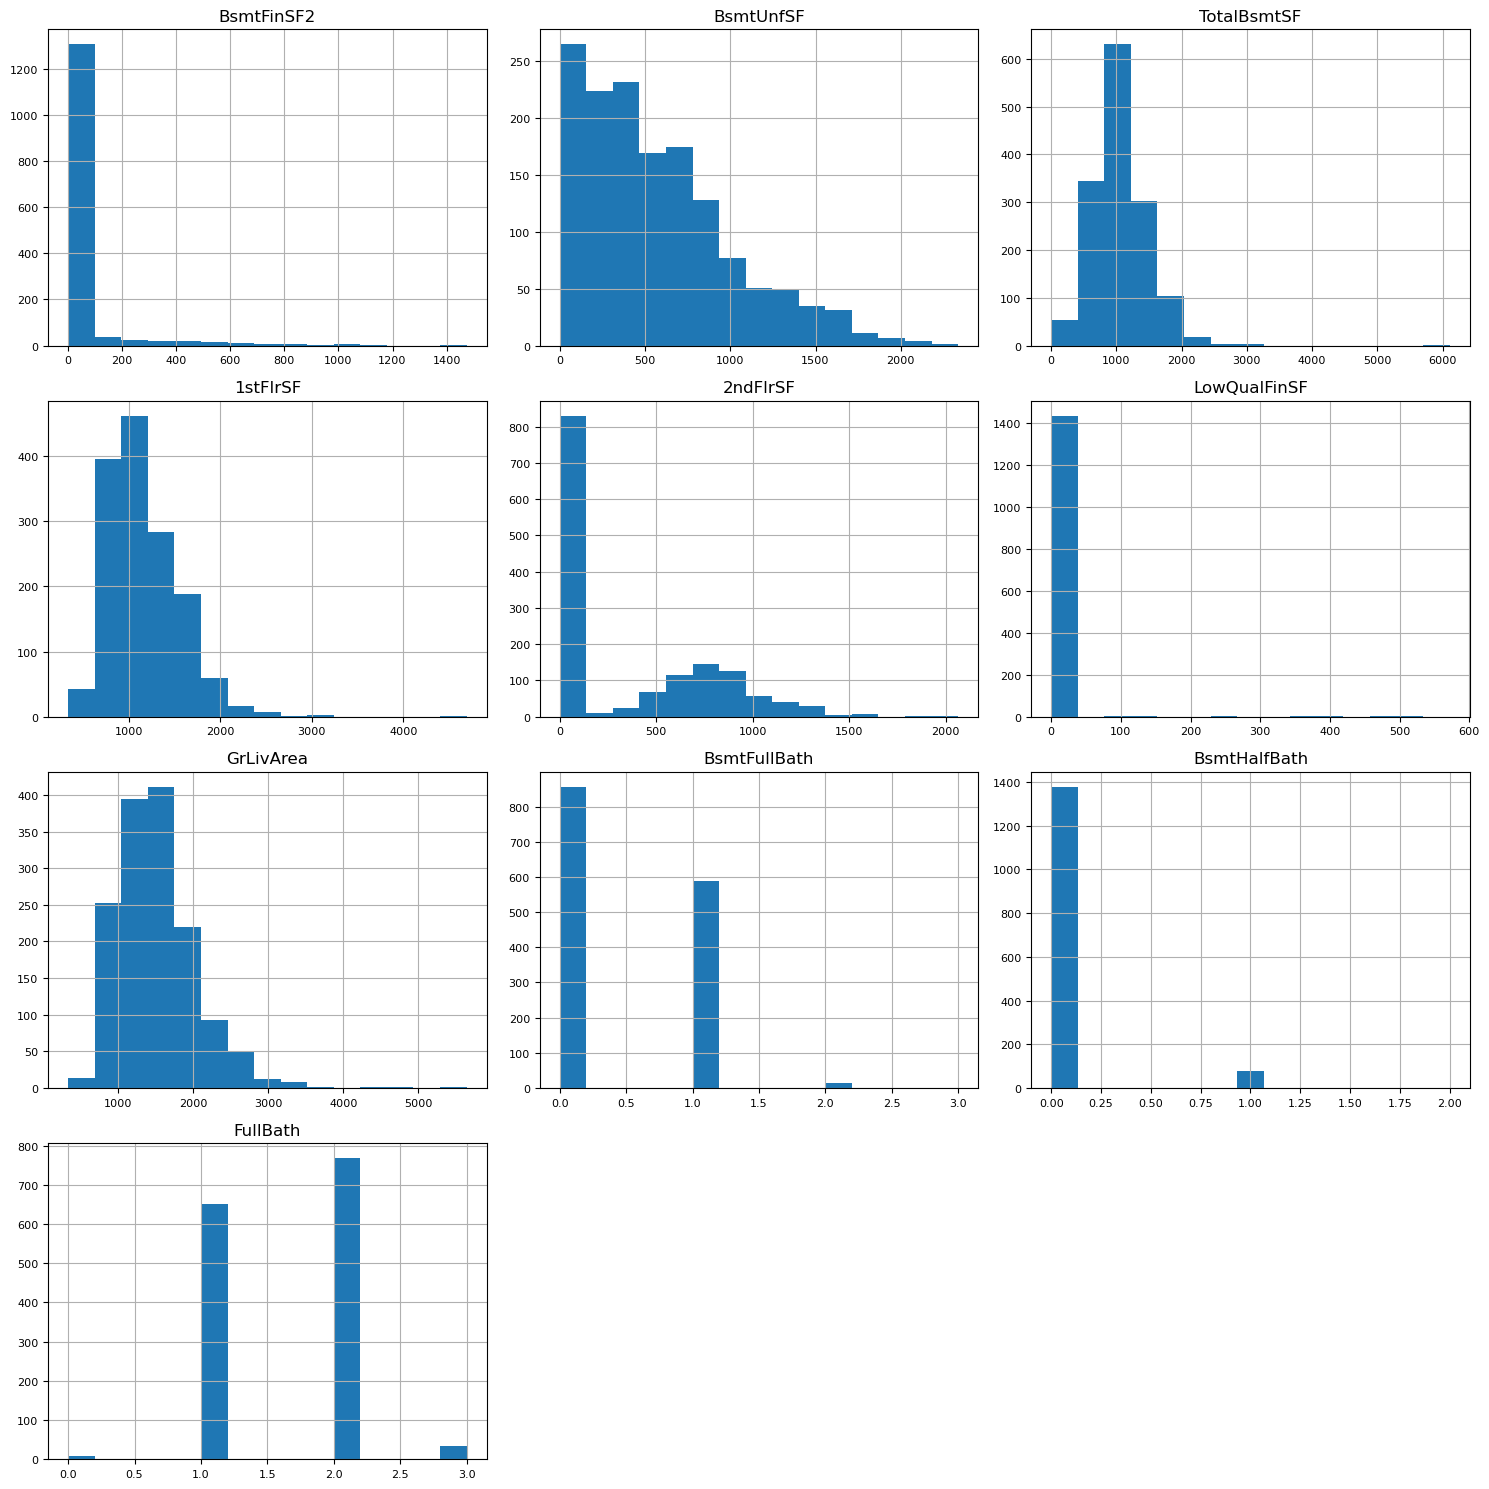

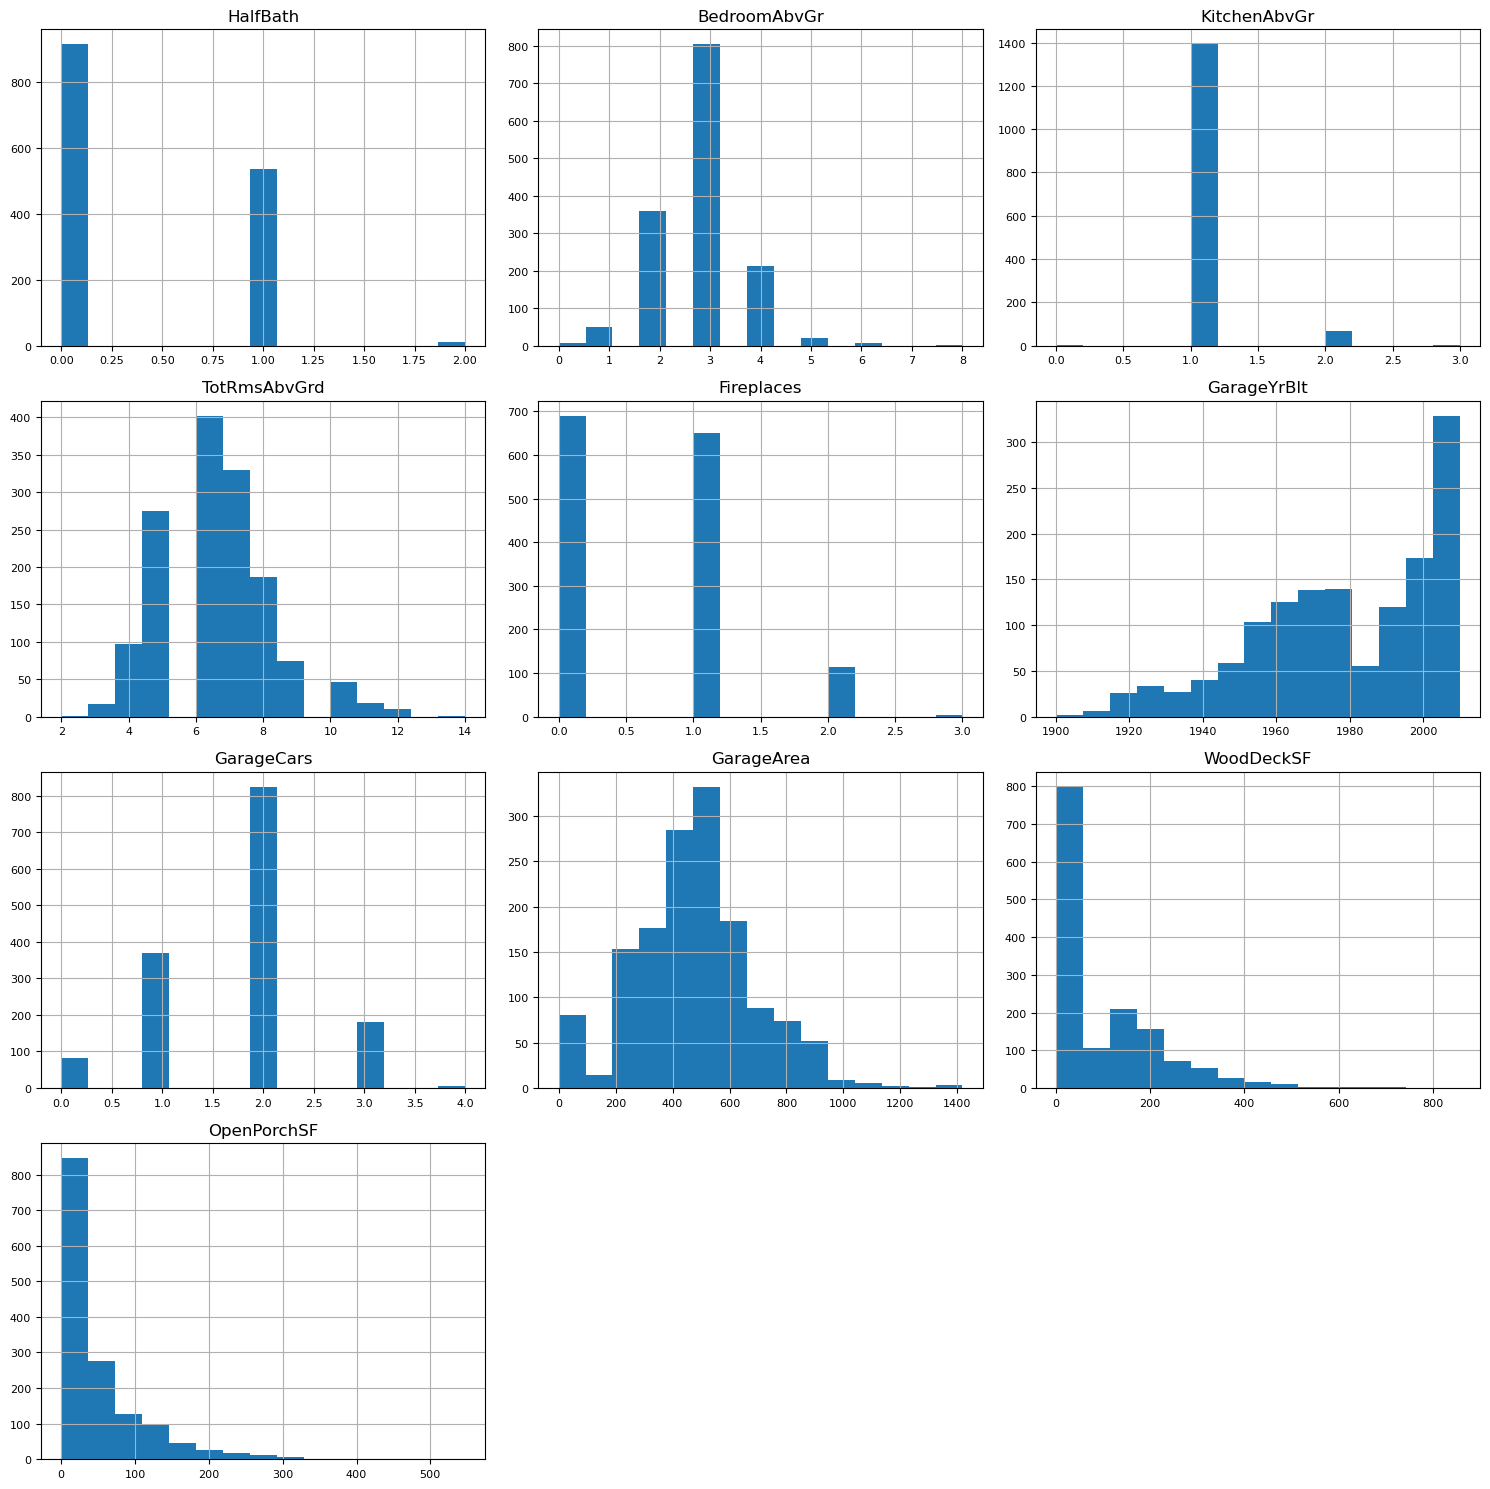

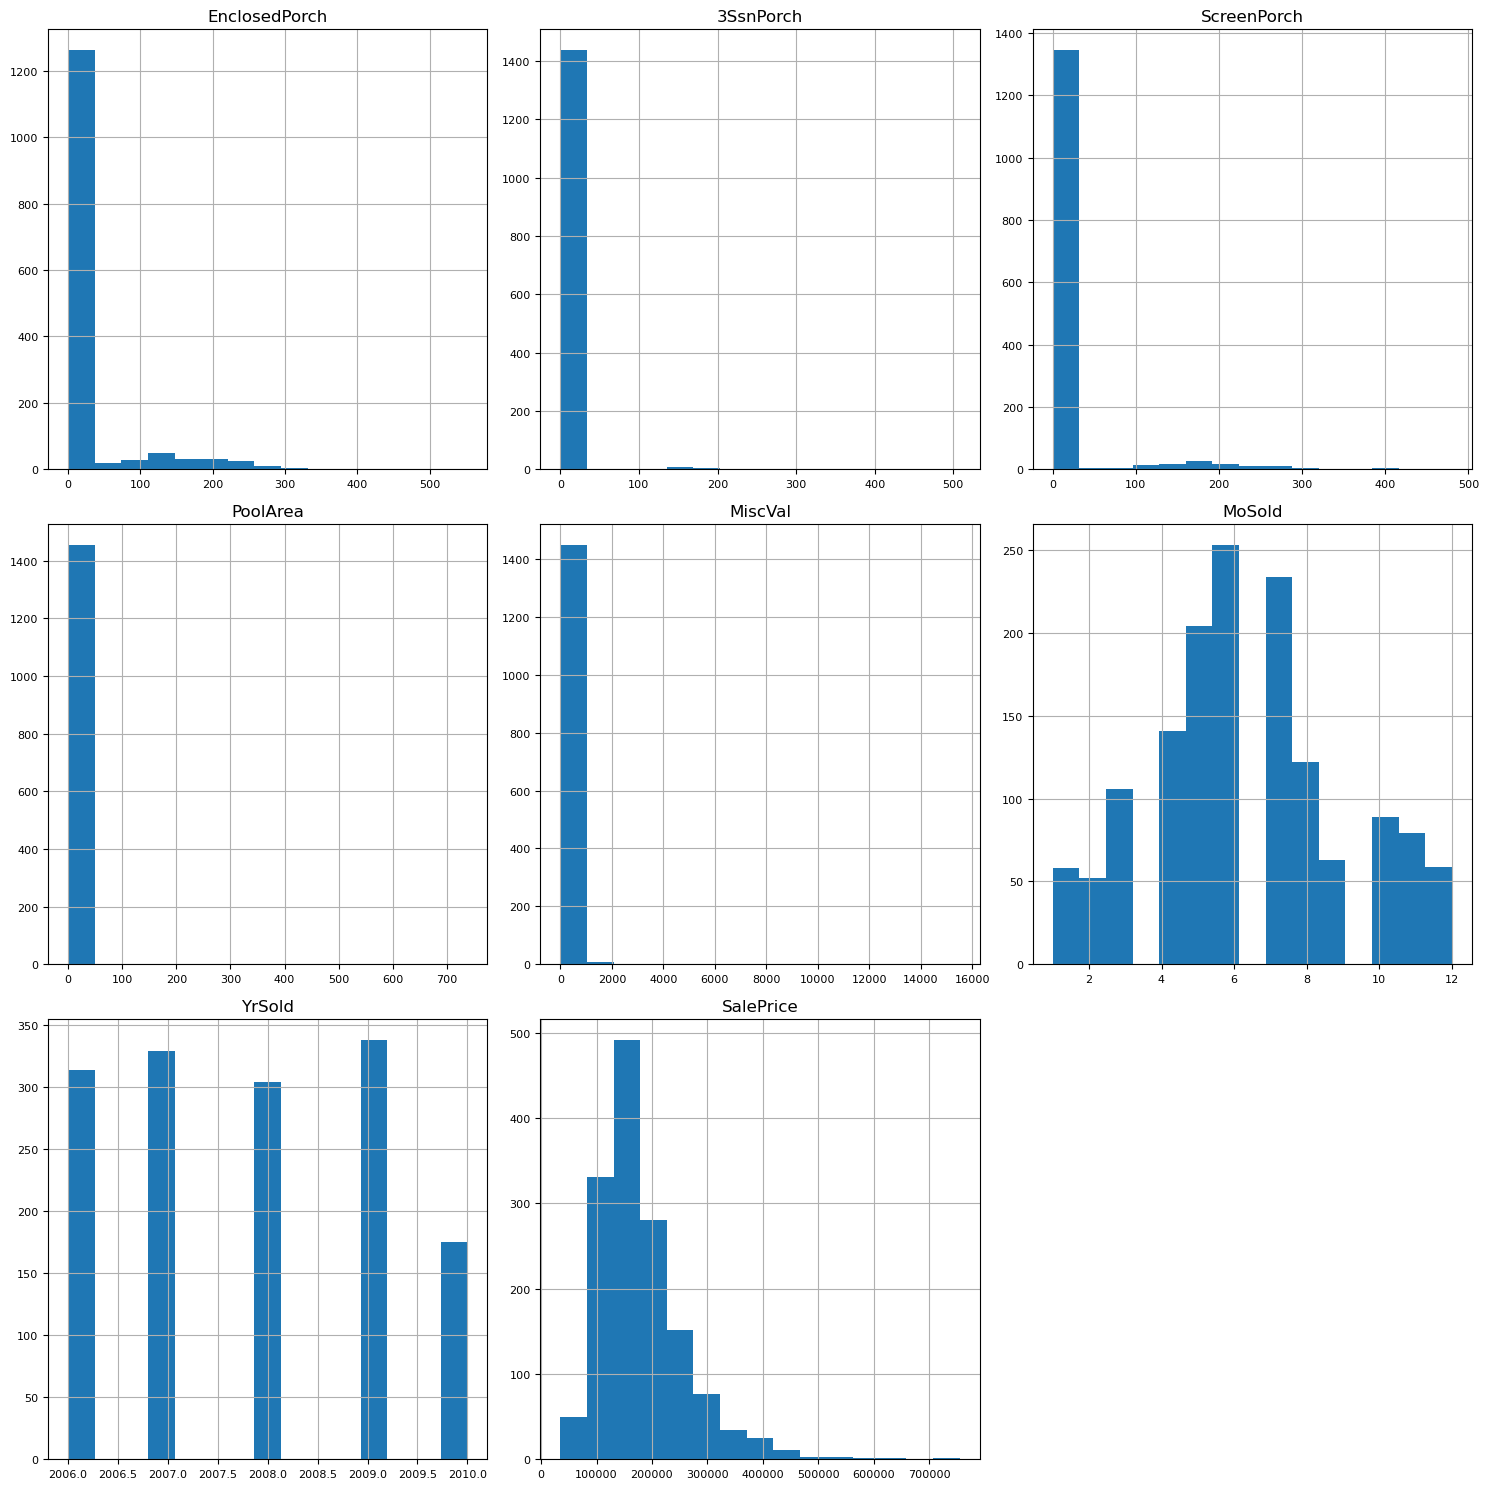

In [3]:
# Number of features to display per figure
features_per_figure = 10

# Number of features and number of required figures
total_features = len(num_features)
total_figures = (total_features + features_per_figure - 1) // features_per_figure

# Generating the figures
for i in range(total_figures):
    start_idx = i * features_per_figure
    end_idx = min(start_idx + features_per_figure, total_features)
    subset_features = num_features[start_idx:end_idx]

    # Plotting the histograms for the subset of features
    train_df[subset_features].hist(bins=15, figsize=(15, 15), xlabelsize=8, ylabelsize=8)
    plt.tight_layout()
    plt.show()

# Note: Each call to plt.show() will generate a new figure with the next subset of histograms.



In [10]:
# Selecting only numerical columns for correlation calculation
numerical_train_df = train_df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation of each numerical feature with 'SalePrice' and ranking them
saleprice_corr = numerical_train_df.corr()['SalePrice'].sort_values(ascending=False)

# Removing the 'SalePrice' from the ranking as it will have a perfect correlation with itself
saleprice_corr = saleprice_corr.drop('SalePrice')

saleprice_corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

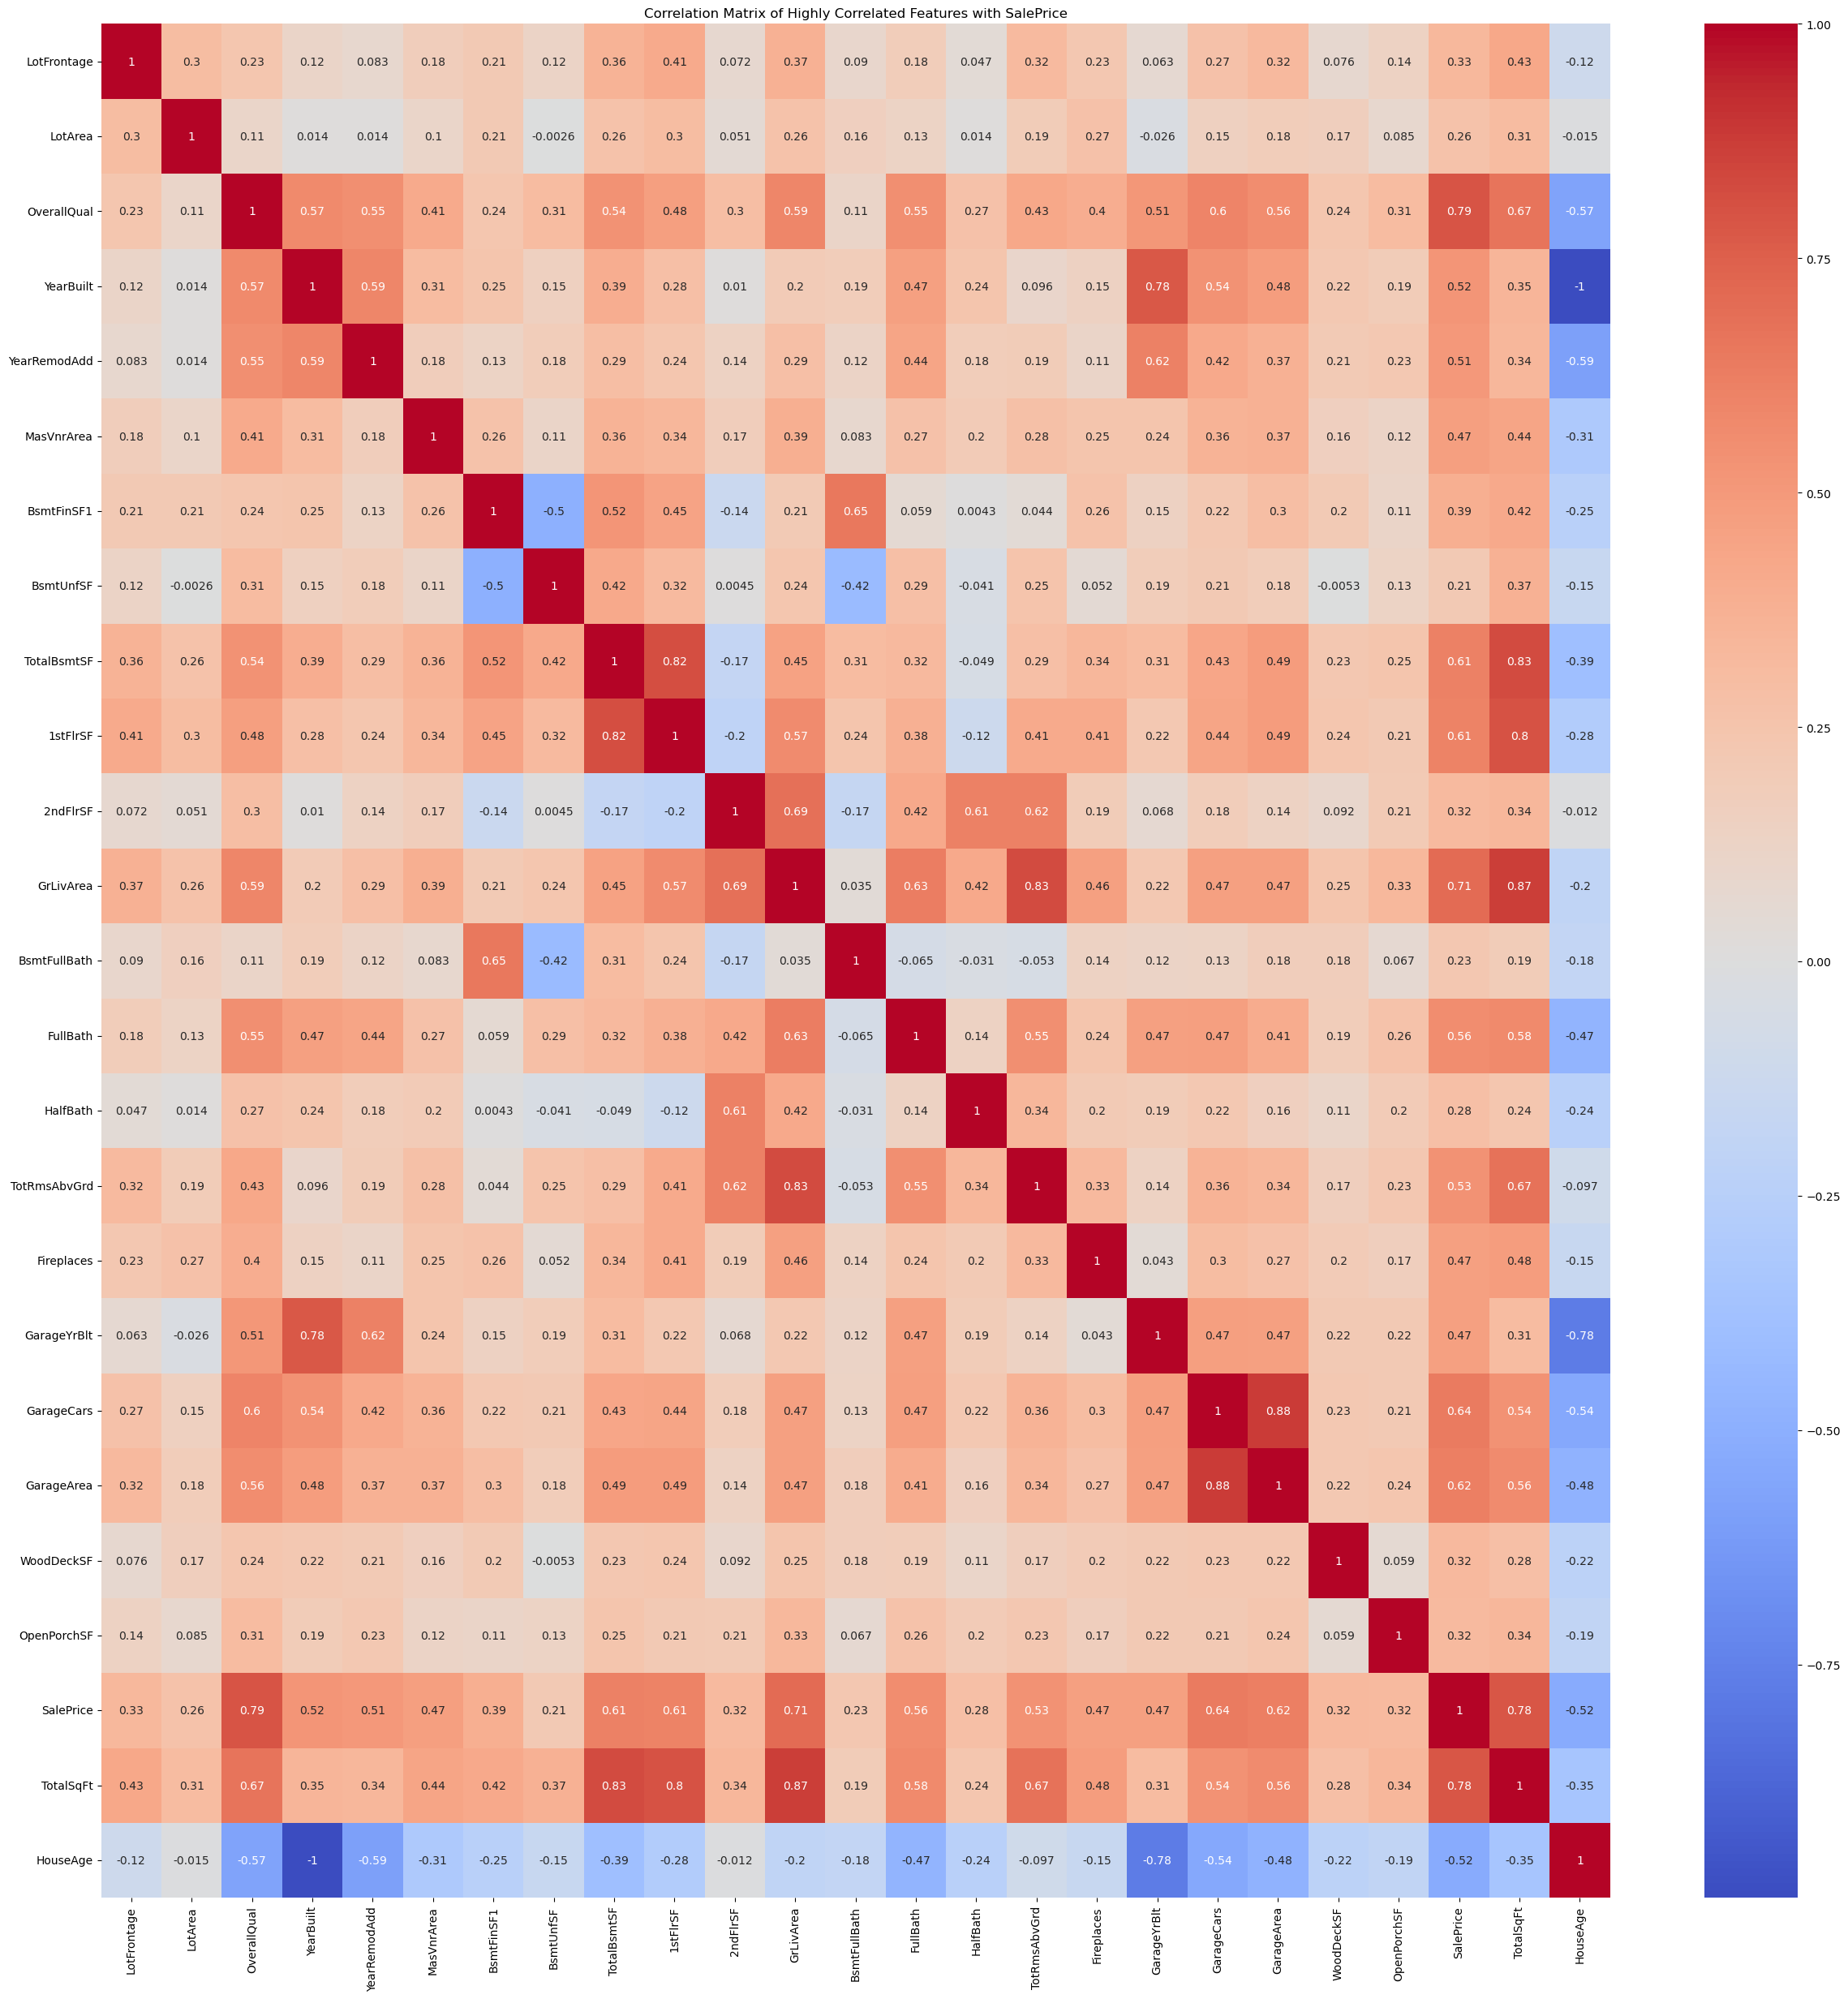

((1460, 83), 'Features with more than 80% missing data have been dropped.')

In [19]:
# Filtering out non-numerical data before computing the correlation matrix
numerical_train_df = train_df.select_dtypes(include=['int64', 'float64'])

# Recomputing the correlation matrix with only numerical data
correlation = numerical_train_df.corr()
high_corr_features = correlation.index[abs(correlation['SalePrice']) > 0.2]

# Plotting the heatmap for highly correlated features
plt.figure(figsize=(30, 30))
sns.heatmap(numerical_train_df[high_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Highly Correlated Features with SalePrice")
plt.show()

# Continuing with the handling of missing data as before
# Handling missing data for numerical and categorical features
num_missing = numerical_train_df.isnull().sum()
num_missing = num_missing[num_missing > 0]
for feature in num_missing.index:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)

cat_missing = train_df.select_dtypes(include=['object']).isnull().sum()
cat_missing = cat_missing[cat_missing > 0]
for feature in cat_missing.index:
    train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)

# Adjusting the code to correctly use the dropna() function with the thresh parameter

# Recalculating the threshold for dropping features
# This time, only using the thresh parameter
drop_threshold = 0.8 * train_df.shape[0]  # 80% of the number of rows

# Dropping features with more than 80% missing data
train_df = train_df.dropna(thresh=drop_threshold, axis=1)

# Checking the shape of the dataframe after dropping features
new_df_shape = train_df.shape

new_df_shape, "Features with more than 80% missing data have been dropped."

In [13]:
import numpy as np

# Reload the data as the previous code execution state was reset
train_df = pd.read_csv(train_data_path)

# Feature Engineering
# a. New Features
# Total square footage as the sum of basement, first and second floor square feet
train_df['TotalSqFt'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

# Age of the house at the time of sale
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# b. Transformation: Applying log transformation to skewed features
# Applying log transformation to 'TotalSqFt' and 'LotArea'
skewed_features = ['TotalSqFt', 'LotArea']
for feature in skewed_features:
    train_df[feature] = np.log1p(train_df[feature])

# Categorical Encoding
# One-Hot Encoding for categorical variables
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Displaying the first few rows of the modified dataframe
train_df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,9.042040,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9.169623,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,9.328212,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9.164401,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,9.565284,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


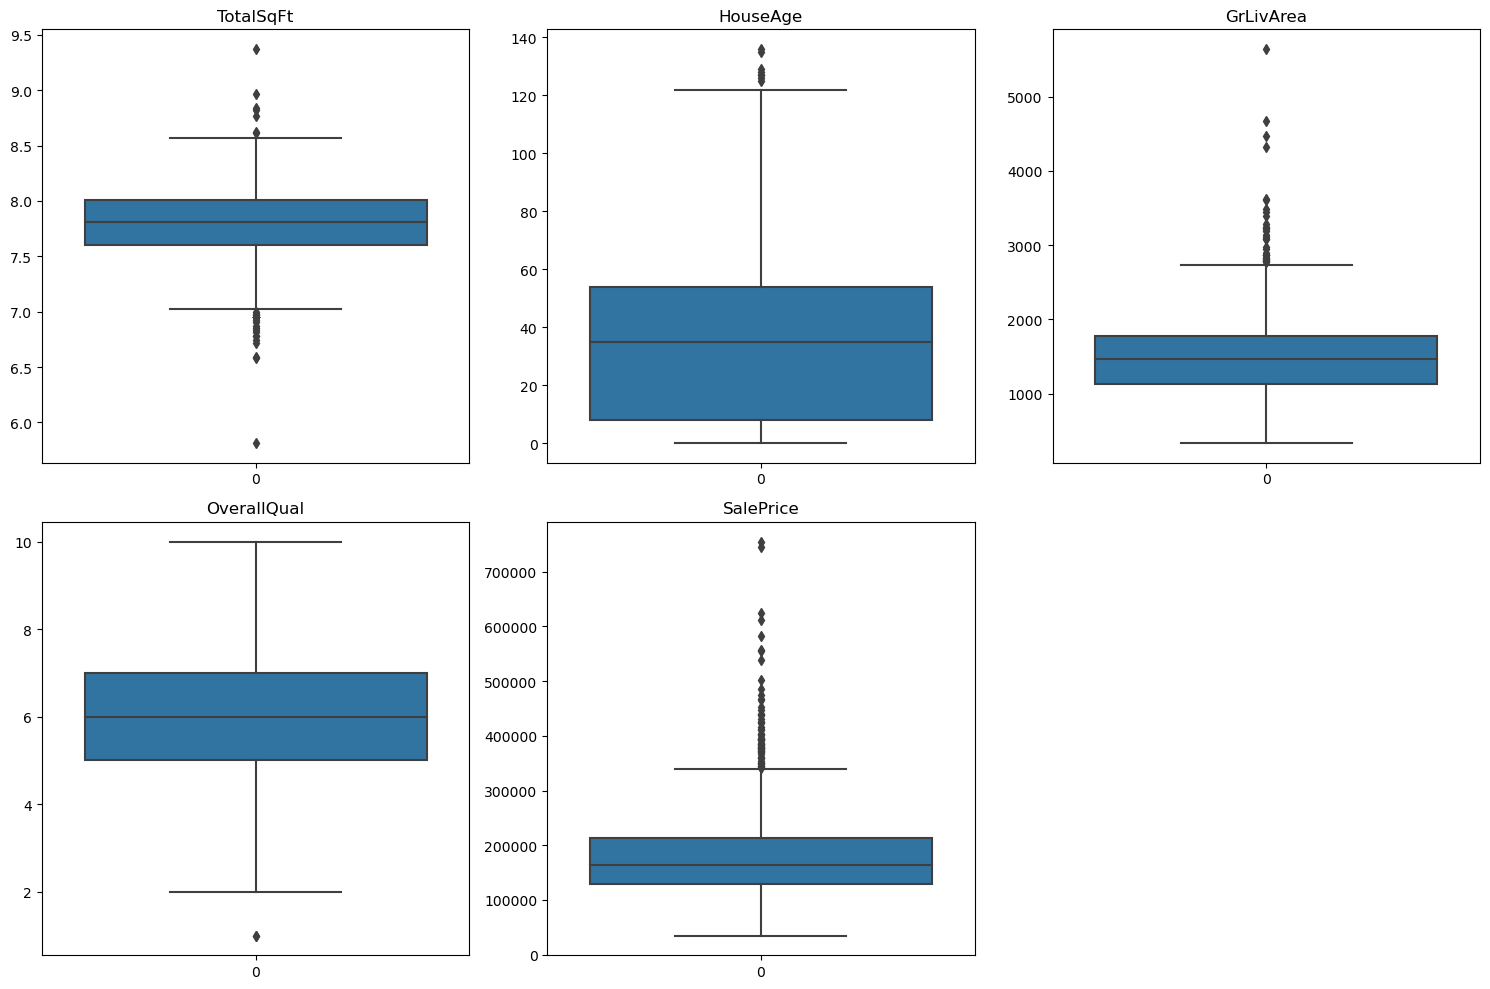

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
train_df = pd.read_csv(train_data_path)

# Apply feature engineering and categorical encoding as previously done
train_df['TotalSqFt'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSqFt'] = np.log1p(train_df['TotalSqFt'])
train_df['LotArea'] = np.log1p(train_df['LotArea'])
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Visual inspection of potential outliers in key features
key_features = ['TotalSqFt', 'HouseAge', 'GrLivArea', 'OverallQual', 'SalePrice']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(train_df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [17]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Reload the dataset
train_df = pd.read_csv(train_data_path)

# Apply feature engineering
train_df['TotalSqFt'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Handle NaNs and Infinities
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.fillna(train_df.mean(), inplace=True)

# Apply log transformation
for feature in ['TotalSqFt', 'HouseAge', 'GrLivArea', 'OverallQual', 'SalePrice']:
    train_df[feature] = np.log1p(train_df[feature])

# Prepare DataFrame for VIF calculation (excluding one-hot encoded categorical variables)
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
vif_df = train_df[numerical_cols]

# Calculating VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = vif_df.columns
vif_data['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

# Display the VIF values
print(vif_data.sort_values(by='VIF', ascending=False))


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [29]:
# Redefining the entire process including necessary imports and variable definitions

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


train_data_path = 'train.csv'

# Read the data
data = pd.read_csv(train_data_path)

# Separate X and y
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initializing regressors
regressors = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
}

# K-Fold with 10 splits
kf = KFold(n_splits=10)

# Metrics to compute
scoring = {'MSE': 'neg_mean_squared_error', 'R2': 'r2'}

# Dictionary to store all results
results = {'MSE': {name: [] for name in regressors.keys()},
           'R2': {name: [] for name in regressors.keys()},
           'Training Time': {name: [] for name in regressors.keys()}}

# Perform cross-validation for each regressor
for name, reg in regressors.items():
    cv_results = cross_validate(reg, X_train, y_train, cv=kf, scoring=scoring, return_train_score=False, n_jobs=-1)

    results['MSE'][name] = -cv_results['test_MSE']  # Negating the MSE because it's negative
    results['R2'][name] = cv_results['test_R2']
    results['Training Time'][name] = cv_results['fit_time']

# Convert results into a DataFrame
for metric in results:
    results[metric] = pd.DataFrame(results[metric])

results['MSE'], results['R2'], results['Training Time']



(   Random Forest  Gradient Boosting
 0   3.984466e+08       3.195899e+08
 1   1.403854e+09       1.252401e+09
 2   5.243327e+08       3.928319e+08
 3   1.799197e+09       1.621311e+09
 4   1.890442e+09       1.122219e+09
 5   1.197502e+09       1.094207e+09
 6   7.641852e+08       5.959306e+08
 7   5.289223e+08       5.436928e+08
 8   6.294151e+08       5.488203e+08
 9   5.686853e+08       4.064445e+08,
    Random Forest  Gradient Boosting
 0       0.915872           0.932522
 1       0.840374           0.857595
 2       0.901023           0.925846
 3       0.656788           0.690721
 4       0.711891           0.828971
 5       0.850245           0.863163
 6       0.854122           0.886240
 7       0.902458           0.899734
 8       0.853011           0.871832
 9       0.901596           0.929670,
    Random Forest  Gradient Boosting
 0       4.411417           0.646174
 1       4.533301           0.655377
 2       4.487161           0.654698
 3       4.415338           0.645359